In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metryki i ewaluacja modeli

Wybór metryk to jeden z najważniejszych etapów – od niego zależy, czy dobrze ocenisz skuteczność modelu. 

Często nie wystarczy jedna liczba: trzeba patrzeć na kilka miar jednocześnie.

---

<div class="alert alert-info">

## Przygotowanie
Dalej przedstawimy wybrane metryki, korzystając z przykładu, w którym model klasyfikuje pacjentów (chory, zdrowy).

Mamy 10 pacjentów:

| Pacjent | Rzeczywistość (chory/zdrowy) | Predykcja modelu |
| ------- | ---------------------------- | ---------------- |
| 1       | chory                        | chory            |
| 2       | chory                        | zdrowy           |
| 3       | chory                        | chory            |
| 4       | zdrowy                       | zdrowy           |
| 5       | zdrowy                       | zdrowy           |
| 6       | zdrowy                       | chory            |
| 7       | zdrowy                       | zdrowy           |
| 8       | chory                        | chory            |
| 9       | zdrowy                       | zdrowy           |
| 10      | zdrowy                       | zdrowy           |

Na podstawie wartości rzeczywistej i przewidywanej zdefiniujemy teraz kilka przypadków - tzw. liczników konfuzji (ang. _confusion counts_)

---

##### ✅ True Positive (Prawdziwie pozytywne, $TP$) 
 
➡️ Model przewidział **chorobę**, i faktycznie pacjent jest **chory**.  
➡️ To **sukces**: model wykrył chorobę tam, gdzie rzeczywiście występowała.

---

##### ✅ True Negative (Prawdziwie negatywne, $TN$)

➡️ Model przewidział **brak choroby**, i pacjent rzeczywiście jest **zdrowy**.  
➡️ To także **sukces**: model **nie wywołuje fałszywego alarmu**, gdy choroby nie ma.

---

##### ❌ False Positive (Fałszywie pozytywne, $FP$) – tzw. *false alarm* - czasem określane jako: **błąd I rodzaju**

➡️ Model przewidział **chorobę**, ale pacjent jest **zdrowy**.  
➡️ To **błąd**: zdrowa osoba zostaje zaklasyfikowana jako chora.  
💡 W praktyce oznacza to **niepotrzebny stres i dodatkowe badania**.

---

##### ❌ False Negative (Fałszywie negatywne, $FN$) – tzw. *przeoczenie* - czasem określane jako: **błąd II rodzaju**

➡️ Model przewidział **zdrowie**, ale pacjent faktycznie jest **chory**.  
➡️ To **najgroźniejszy błąd**: pacjent jest chory, lecz model tego **nie zauważył**.  
💡 W praktyce oznacza to, że **chory nie zostaje objęty leczeniem**.

---

#### 📝 Ćwiczenie: Przyporządkuj pacjentów z tabeli do jednej z grup


</div>


In [10]:
TP = [1, 3, 8]
TN = [4, 5, 7, 9, 10]
FP = [6]
FN = [2]

## Klasyfikacja




### Confusion Matrix

Liczniki te przedstawiane są często w formie macierzy (confusion matrix)

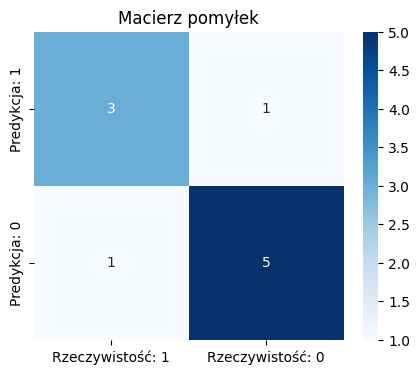

In [11]:
from dataclasses import dataclass


@dataclass
class ConfusionCounts:
    TP: int
    TN: int
    FP: int
    FN: int


def draw_confusion_matrix(confusion_counts):

    # --- zbuduj macierz ---
    conf_matrix = np.array([[confusion_counts.TP, confusion_counts.FP],
                            [confusion_counts.FN, confusion_counts.TN]])
    
    # --- narysuj ---
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Rzeczywistość: 1", "Rzeczywistość: 0"],
                yticklabels=["Predykcja: 1", "Predykcja: 0"])
    plt.title("Macierz pomyłek")
    plt.show()

d = confusion_counts = ConfusionCounts(TP=len(TP), TN=len(TN), FP=len(FP), FN=len(FN))
draw_confusion_matrix(d)


### Accuracy

**Definicja:** odsetek poprawnie sklasyfikowanych przykładów.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


📌 **Intuicja:** „z ilu przypadków model trafił prawidłowo?”.

⚠️ **Uwaga:** przy niezbalansowanych danych (np. 99% zdrowych pacjentów, 1% chorych) accuracy bywa mylące – model zawsze mówiący „zdrowy” miałby 99%.

🔎 **Obliczenia:**

In [12]:
accuracy = (d.TP + d.TN) / (d.TP + d.TN + d.FP + d.FN)
accuracy

0.8


👉 **Accuracy = 80%** – model trafił poprawnie w 8 na 10 przypadków.

⚠️ **Uwaga:** gdyby zamiast 4 chorych było tylko 1, a model zawsze przewidywałby „zdrowy”, accuracy wyniosłoby 90%, mimo że model **nigdy nie wykryłby choroby**.


### Precision i Recall

* **Precision (dokładność):** z przewidzianych pozytywów – jaki procent faktycznie był pozytywny.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

* **Recall (czułość):** z faktycznych pozytywów – jaki procent został znaleziony.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

📌 **Intuicja:**

* Precision = „jak bardzo mogę ufać pozytywnym predykcjom modelu”.
* Recall = „ile faktycznych pozytywów udało się wykryć”.

🔎 **Obliczenia:**

In [13]:
precision = d.TP / (d.TP + d.FP)
recall = d.TP / (d.TP + d.FN)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.75
Recall: 0.75




📊 **Wyniki w przykładzie pacjentów:**

* **Precision = 0.75** → spośród wszystkich osób, które model uznał za chore, **75% faktycznie było chorych**. Innymi słowy: co czwarty alarm był fałszywy (FP).
* **Recall = 0.75** → model wykrył **75% wszystkich chorych pacjentów**. Innymi słowy: co czwartego chorego przeoczył (FN).

---

⚖️ **Interpretacja praktyczna:**

* Precision mówi nam, czy nie nadużywamy etykiety „chory” (czy pacjenci fałszywie alarmowani to wyjątki, czy większość).
* Recall mówi, czy nie przeoczamy zbyt wielu faktycznie chorych pacjentów.

---

💡 **Wniosek:**
Model jest **średni** – zarówno wykrywa większość chorych, jak i unika wielu fałszywych alarmów, ale w obu obszarach popełnia błędy. W zależności od zastosowania moglibyśmy chcieć:

* **podnieść Recall** (np. w medycynie, żeby nie przegapić chorych, nawet kosztem większej liczby FP),
* **podnieść Precision** (np. w spam filtrach, żeby nie usuwać dobrych maili).




### F1-score

Harmoniczna średnia Precision i Recall:
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

📌 **Intuicja:** równoważy precision i recall, szczególnie gdy zależy nam na obu (np. w klasyfikacji medycznej).

🔎 **Obliczenia:**

In [14]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.75

📊 **Wynik w przykładzie pacjentów:**

* Precision = 0.75
* Recall = 0.75
* **F1-score = 0.75**

---

⚖️ **Interpretacja:**

* F1-score jest wysoki wtedy, gdy **oba wskaźniki (Precision i Recall) są dobre**.
* Jeśli jeden z nich jest niski, F1-score również spadnie, bo harmoniczna średnia „kara” brak równowagi.
* W naszym przypadku Precision i Recall są równe, więc F1-score wyszedł dokładnie taki sam.

---

💡 **Wniosek praktyczny:**

* **F1 = 0.75** oznacza, że model radzi sobie **przeciętnie dobrze**, ale nadal co czwarty przypadek jest błędny (albo fałszywy alarm, albo przeoczenie).
* W zastosowaniach krytycznych (np. medycyna) taki wynik mógłby być niewystarczający – wtedy trzeba zdecydować, czy ważniejsze jest **wyłapanie wszystkich chorych** (Recall), czy **uniknięcie fałszywych alarmów** (Precision).


### ROC-AUC i PR-AUC

**ROC-AUC (Receiver Operating Characteristic – Area Under Curve):**

* Krzywa ROC pokazuje zależność między:

  * **True Positive Rate ($TPR = Recall$)**,
  * a **False Positive Rate ($FPR = FP / (FP + TN)$)**,
* AUC (Area Under Curve) to pole pod tą krzywą.

**PR-AUC (Precision–Recall AUC):**

* Krzywa Precision–Recall rysuje Precision w funkcji Recall.
* Szczególnie użyteczna przy **niezbalansowanych klasach**, gdzie ROC-AUC bywa zbyt optymistyczne (bo dużo TN „maskuje” słabą wykrywalność pozytywów).

---

📌 **Intuicja:**

* **AUC = 0.5** → model zgaduje losowo (linia przekątnej).
* **AUC = 1.0** → model idealny.
* **Im bliżej 1, tym lepiej.**


##### Przykład

Do tej pory liczyliśmy metryki (Accuracy, Precision, Recall, F1) zakładając, że model zwraca **tylko etykiety 0/1** („chory” / „zdrowy”).
👉 Ale żeby móc narysować krzywe **ROC** i **PR**, potrzebujemy czegoś więcej: **prawdopodobieństw predykcji** (np. „Pacjent 1 ma 90% szansy na chorobę”).

Dzięki temu możemy **zmieniać próg decyzyjny** (np. 0.3, 0.5, 0.7) i obserwować, jak zmieniają się TP, FP, TN i FN.

---

###### Przykład – 10 pacjentów z predykcjami prawdopodobieństw oraz programi decyzyjnymi

In [15]:
import pandas as pd
import numpy as np

# --- 1) Dane wejściowe: Pacjent, prawda (y_true: 1=chory, 0=zdrowy), prawdopodobieństwo modelu ---
dane = [
    (1, 1, 0.90),
    (2, 1, 0.40),
    (3, 1, 0.80),
    (4, 0, 0.10),
    (5, 0, 0.20),
    (6, 0, 0.70),
    (7, 0, 0.05),
    (8, 1, 0.60),
    (9, 0, 0.15),
    (10, 0, 0.30),
]

df = pd.DataFrame(dane, columns=["Pacjent", "y_true", "prawdopodobieństwo"])

# Dodajmy przyjazną etykietę prawdy ("labelka") obok wersji numerycznej
df["labelka"] = np.where(df["y_true"] == 1, "chory", "zdrowy")


progi = [0.90, 0.70, 0.50, 0.30, 0.10]
df = df.assign(**{f"pred@{t:.2f}": (df["prawdopodobieństwo"] >= t).astype(int) for t in progi})

pred_cols = [f"pred@{t:.2f}" for t in progi]

# (opcjonalnie) porządek kolumn
df = df[["Pacjent", "labelka", "y_true", "prawdopodobieństwo"] + pred_cols]
df

,Pacjent,labelka,y_true,prawdopodobieństwo,pred@0.90,pred@0.70,pred@0.50,pred@0.30,pred@0.10
0,1,chory,1,0.90,1,1,1,1,1
1,2,chory,1,0.40,0,0,0,1,1
2,3,chory,1,0.80,0,1,1,1,1
3,4,zdrowy,0,0.10,0,0,0,0,1
4,5,zdrowy,0,0.20,0,0,0,0,1
5,6,zdrowy,0,0.70,0,1,1,1,1
6,7,zdrowy,0,0.05,0,0,0,0,0
7,8,chory,1,0.60,0,0,1,1,1
8,9,zdrowy,0,0.15,0,0,0,0,1
9,10,zdrowy,0,0.30,0,0,0,1,1


In [16]:

def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())
    return TP, FP, TN, FN

def metrics_one(y_true, y_pred):
    TP, FP, TN, FN = confusion_counts(y_true, y_pred)
    total = TP + FP + TN + FN
    acc = (TP + TN) / total if total else np.nan
    prec = TP / (TP + FP) if (TP + FP) else 0.0
    rec = TP / (TP + FN) if (TP + FN) else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0

    tpr = rec
    fpr = FP / (FP + TN) if (FP + TN) else 0.0
    return TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr

In [17]:


rows = []
for col in pred_cols:
    TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr  = metrics_one(df["y_true"], df[col])
    thr = float(col.split("@", 1)[1]) if "@" in col else None
    rows.append({
        "pred_col": col,
        "threshold": thr,
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "accuracy": round(acc, 3),
        "precision": round(prec, 3),
        "recall": round(rec, 3),
        "f1": round(f1, 3),
        "TPR": round(tpr, 3),
        "FPR": round(fpr, 3),
    })

metrics_df = pd.DataFrame(rows).sort_values("threshold", ascending=False)
metrics_df

,pred_col,threshold,TP,FP,TN,FN,accuracy,precision,recall,f1,TPR,FPR
0,pred@0.90,0.9,1,0,6,3,0.7,1.000,0.25,0.400,0.25,0.000
1,pred@0.70,0.7,2,1,5,2,0.7,0.667,0.50,0.571,0.50,0.167
2,pred@0.50,0.5,3,1,5,1,0.8,0.750,0.75,0.750,0.75,0.167
3,pred@0.30,0.3,4,2,4,0,0.8,0.667,1.00,0.800,1.00,0.333
4,pred@0.10,0.1,4,5,1,0,0.5,0.444,1.00,0.615,1.00,0.833


#### Krzywa ROC

* Oś Y: **True Positive Rate**: $TPR = Recall$
* Oś X: **False Positive Rate**: $FPR = FP / (FP + TN)$

Dla różnych progów decyzyjnych (np. 0.9, 0.7, 0.5, 0.3, 0.1) obliczamy TPR i FPR.
Każdy próg to jeden punkt na wykresie – łącząc je, otrzymujemy krzywą ROC.

👉 **AUC (Area Under Curve)** to pole pod tą krzywą:

* **0.5** → model losowy (linia przekątnej),
* **1.0** → model idealny.

Skorzystamy z funkcji wbudowanych w pakiet `sklearn.metrics`, by policzyć i wyrysować krzywą ROC. Jak zobaczymy taki wykres różni się nieco od zwykłego plot. 
Choć przy gestym wykresie te wykresy pewnie nałożyłyby się na siebie

ROC AUC = 0.917


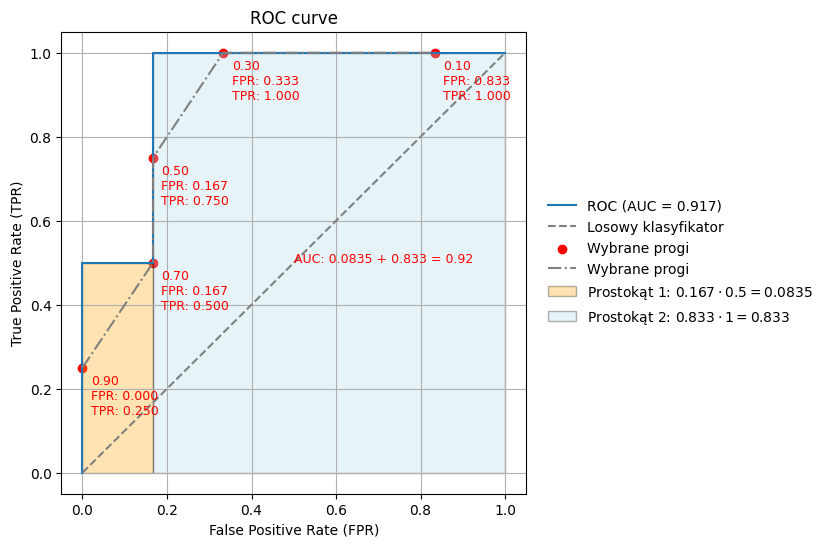

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score


y_true = df["y_true"]
y_score = df["prawdopodobieństwo"]

roc_auc = roc_auc_score(y_true, y_score)

print(f"ROC AUC = {roc_auc:.3f}")

# --- ROC curve (pełna) ---
fpr, tpr, roc_thr = roc_curve(y_true, y_score)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Losowy klasyfikator")


# --- punkty z metrics_df  ---
plt.scatter(metrics_df["FPR"], metrics_df["TPR"], color="red", label="Wybrane progi")

# --- zwykłe łączenie punktów ---
plt.plot(metrics_df["FPR"], metrics_df["TPR"], linestyle="-.", color="gray", label="Wybrane progi")

# etykiety progów
for f, t, thr in metrics_df[["FPR", "TPR", "threshold"]].itertuples(index=False):
    plt.text(f+0.02, t-0.11, f"{thr:.2f}\nFPR: {f:.3f}\nTPR: {t:.3f}", fontsize=9, color="red")


krotki_x = 0.167
dlugi_x = 1 - krotki_x

x1 = [0.0, krotki_x, krotki_x, 0.0]
y1 = [0.0, 0.0, 0.5, 0.5]
plt.fill(x1, y1, alpha=0.3, color="orange", edgecolor="black", label=rf"Prostokąt 1: $0.167\cdot0.5={0.167 * 0.5}$")
# 2. prostokąt (wyższy)

x2 = [krotki_x, 1, 1, krotki_x]
y2 = [0, 0, 1, 1]
plt.fill(x2, y2, alpha=0.3, color="lightblue", edgecolor="black", label=rf"Prostokąt 2: ${1-0.167}\cdot1={(1-0.167) * 1}$")


plt.text(0.5, 0.5, f"AUC: {0.167 * 0.5} + {1-0.167} = {0.167*0.5 + 1-0.167:0.2f}", fontsize=9, color="red")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve")


plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.grid(True)
plt.show()

In [19]:
round(0.167 * 0.5 + (1-0.167) * 1, 2)

0.92

In [20]:
round(roc_auc, 2)

0.92

##### Interpretacja wykresu


* **Linia ciągła (ROC)**: pokazuje jak zmienia się **czułość ($TPR = Recall$)** względem **odsetka fałszywych alarmów (FPR)** przy różnych progach.
* **Linia przerywana**: model losowy (referencja).
* **Kropki**: wybrane progi - punkty z naszego df
* **AUC = 0.92**: bardzo dobry wynik. Intuicyjnie: w ~92% par *(chory, zdrowy)* model nadaje wyższe prawdopodobieństwo choremu niż zdrowemu.

###### Punkty progów:

Dla 4 chorych i 6 zdrowych:

In [21]:
metrics_df[["threshold", "TP", "FP", "TN", "FN", "TPR", "FPR"]]

,threshold,TP,FP,TN,FN,TPR,FPR
0,0.9,1,0,6,3,0.25,0.000
1,0.7,2,1,5,2,0.50,0.167
2,0.5,3,1,5,1,0.75,0.167
3,0.3,4,2,4,0,1.00,0.333
4,0.1,4,5,1,0,1.00,0.833


##### Wnioski z punktów

* **0.90 TPR: 0.25 FPR: 0**: bardzo „ostrożny” próg (zero fałszywych alarmów), ale niska czułość (tylko 25% chorych wykrytych).
* **0.70 TPR: 0.5 FPR: 0.167**: umiarkowanie „ostrożny” próg (są fałszywe alarmy), ale czułość nadal niska (tylko 50% chorych wykrytych).
* **0.50 TPR: 0.75 FPR: 0.167**: dla tego samego FPR=0.167 daje wyższy TPR (0.75 vs 0.50). Punkt 0.70 jest zatem **niedominujący** (gorszy wybór). Przy progu 0.50 wykrywamy już 75% chorych.
* **0.30**: maksymalna czyłość (TPR = Recall =1.0), ale kosztem zwiększonych fałszywych alarmów FPR (=0.333).
* **0.10**: czułość się nie zmienia ale fałszywe alarmy znacznie wzrosły (FPR 0.833).

##### Jak wybrać próg operacyjny?

* Jeśli **nie chcesz przepuścić chorych** (priorytet Recall) → **0.30** (TPR=1.0), akceptując więcej FP.
* Jeśli chcesz **dobrego kompromisu** przy niskim FPR → **0.50** (TPR=0.75, FPR=0.167).
* Jeśli kluczowe jest **minimalizowanie fałszywych alarmów** → **0.90** (FPR=0.0), ale wiesz, że przeoczysz wielu chorych.

##### Dlaczego wykres jest „schodkowy”?

Masz mało punktów i niewiele unikalnych skoków — każdy nowy próg zmienia klasyfikację o całe przypadki, więc krzywa rośnie skokowo. 
AUC policzone z pełnej listy prawdopodobieństw daje „gładkie” pole pod taką schodkową krzywą.

##### Jak obliczany jest AUC?

Na wykresie widzimy 2 prostokąty - musimy zsumować ich pola. I tak samo by było dla większej liczby przedziałów

* między 0 a 0.167 mamy 0.5
* między 0.167 a 1 mamy 1

**Suma ≈ 0.92**



#### Krzywa Precision–Recall (PR curve)

* Oś Y: $Precision = TP / (TP+FP)$
* Oś X: $Recall = TP / (TP+FN)$

Analogicznie, dla różnych progów obliczamy pary (Precision, Recall).
Powstaje krzywa Precision–Recall, a **PR-AUC** to pole pod nią.

👉 **PR-AUC** jest szczególnie ważne przy **niezbalansowanych klasach** (np. 1 chory na 100 zdrowych), bo **skupia się na jakości wykrywania klasy pozytywnej, zamiast maskować wynik dużą liczbą TN**.

Average Precision (AP) = 0.887


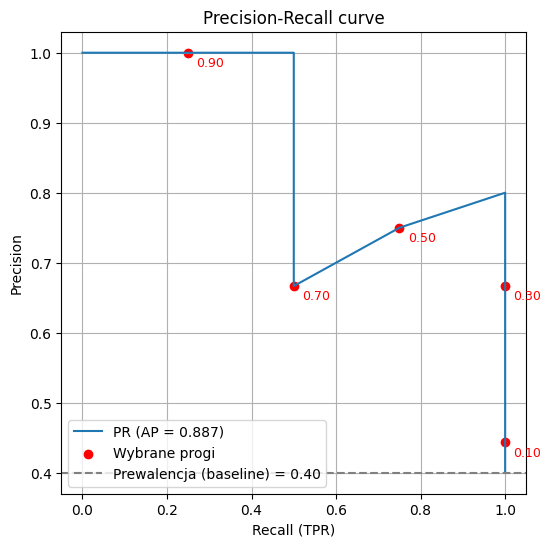

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

avg_prec = average_precision_score(y_true, y_score)
print(f"Average Precision (AP) = {avg_prec:.3f}")

# --- Precision-Recall curve (pełna) ---
prec, rec, pr_thr = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(6,6))
plt.plot(rec, prec, label=f"PR (AP = {avg_prec:.3f})")

# --- punkty z metrics_df (jedna seria) ---
plt.scatter(metrics_df["recall"], metrics_df["precision"], color="red", label="Wybrane progi")

# etykiety progów przy punktach
for r, p, thr in metrics_df[["recall", "precision", "threshold"]].itertuples(index=False):
    plt.text(r+0.02, p-0.02, f"{thr:.2f}", fontsize=9, color="red")


# --- linia prewalencji (baseline losowego klasyfikatora) ---
prevalence = float(np.mean(y_true))  # u Ciebie będzie 0.40
plt.axhline(prevalence, linestyle="--", color="gray",
            label=f"Prewalencja (baseline) = {prevalence:.2f}")

plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()
plt.grid(True)
plt.show()



##### Co pokazują osie

* **X = Recall (TPR)** – jaki odsetek chorych wychwycisz przy danym progu.
  * wysoki próg - mało wykryć
  * mały próg - dużo wykryć
  
* **Y = Precision** – jaki odsetek wyników pozytywnych to faktycznie chorzy.
  * wysoki próg to też wysoka precyzja (czyli wykrywanie faktycznie chorych). Natomiast też jak widać wysoka precyzja to niska czułość. 

##### Jak powstaje krzywa

Idziesz od wysokich progów (mało wykryć, ale bardzo czyste) do niskich (dużo wykryć, ale więcej fałszywych).
Dlatego krzywa ma **schodki w dół**: gdy zwiększasz recall, zwykle spada precision.

##### Punkty progowe (czerwone)

Każdy podpis to działanie modelu przy konkretnym **progu**:

* np. ~**0.90** → **recall ≈ 0.25, precision ≈ 1.0** (wykrywasz 25% chorych i praktycznie bez pomyłek),
* **0.70** → recall ≈ 0.5, precision ≈ 0.67,
* **0.50** → recall ≈ 0.75, precision ≈ 0.75,
* **0.30** → recall ≈ 1.0, precision ≈ 0.67,
* **0.10** → recall ≈ 1.0, precision ≈ 0.43 (łapiesz wszystkich, ale dużo FP).

##### Linia bazowa (intuicja)

Wartością odniesienia jest **prevalence** = odsetek pozytywów w danych. U Ciebie to **4/10 = 0.4**.
Losowy klasyfikator miałby precision ≈ 0.4 niezależnie od recall. Twoja krzywa jest **dużo powyżej**, więc model jest sensowny.

#### AP (Average Precision)

To **pole pod krzywą PR** (średnia precision po całym zakresie recall).
U Ciebie **AP = 0.887** → model **utrzymuje wysoką precision także przy rosnącym recall** (bardzo dobry wynik przy prevalence 0.4).

#### Kiedy używać PR vs ROC

* **PR** lepiej ocenia modele przy **niezrównoważonych klasach** i gdy ważne są fałszywe alarmy (precision).
* **ROC** bywa zbyt optymistyczny w takich warunkach.

#### Jak wybrać próg

* Ustal wymóg biznesowy: „chcę **precision ≥ P**” albo „**recall ≥ R**” i wybierz punkt spełniający warunek.
* Albo zmaksymalizuj **F1** (zbalansowane P–R) lub **Fβ** (β>1 faworyzuje recall, β<1 — precision):
  [
  F_\beta=\frac{(1+\beta^2),PR}{\beta^2 P + R}
  ]
  Jeśli chcesz, dodam na wykresie **izolinie F1/Fβ** i wskażę próg maksymalizujący wybraną metrykę.


#### Intuicja

* **ROC-AUC** mówi: *na ile model umie oddzielić chorych od zdrowych w całym zakresie progów*.
* **PR-AUC** mówi: *czy model naprawdę dobrze wyłapuje pozytywnych i czy możemy mu ufać przy rzadkiej chorobie*.

---

💡 **Wniosek praktyczny:**

* Jeśli klasy są **zbalansowane** → ROC-AUC daje dobry obraz.
* Jeśli klasa pozytywna jest **rzadka** (np. choroba, fraud, defekt) → PR-AUC jest lepszym wyborem.


## Regresja

### MAE (Mean Absolute Error)

$$
MAE = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

📌 **Intuicja:** średnio, o ile jednostek (np. złotych, sztuk) się mylimy.

---

In [23]:
import numpy as np

y_true = np.array([3.0, 2.5, 4.1])

# Przypadek 1: wszystkie przewidywania blisko
y_pred_good = np.array([2.8, 2.7, 3.9])
mae_good = np.mean(np.abs(y_true - y_pred_good))
print("MAE (małe błędy):", mae_good)   # 0.2

# Przypadek 2: dwa dobre przewidywania, jeden duży błąd
y_pred_bad = np.array([2.8, 2.7, 10.0])
mae_bad = np.mean(np.abs(y_true - y_pred_bad))
print("MAE (duży błąd w 1 elemencie):", mae_bad)  # ~2.1


MAE (małe błędy): 0.20000000000000004
MAE (duży błąd w 1 elemencie): 2.1


### RMSE (Root Mean Squared Error)

$$
RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}
$$

📌 **Intuicja:** karze duże błędy mocniej niż MAE. Przydaje się, gdy zależy nam na ograniczeniu rzadkich, ale dużych pomyłek.

---

In [24]:
import numpy as np

# Dane rzeczywiste
y_true = np.array([3.0, 2.5, 4.1])

# 🔹 Przypadek 1: wszystkie przewidywania blisko wartości rzeczywistych
y_pred_good = np.array([2.8, 2.7, 3.9])
rmse_good = np.sqrt(np.mean((y_true - y_pred_good) ** 2))
print("RMSE (małe błędy):", rmse_good)  # ~0.2

# 🔹 Przypadek 2: dwa przewidywania dobre, ale jeden duży błąd
y_pred_bad = np.array([2.8, 2.7, 10.0])
rmse_bad = np.sqrt(np.mean((y_true - y_pred_bad) ** 2))
print("RMSE (duży błąd w 1 elemencie):", rmse_bad)  # ~3.41


RMSE (małe błędy): 0.20000000000000004
RMSE (duży błąd w 1 elemencie): 3.410278580995987


### R² (Coefficient of Determination)

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

📌 **Intuicja:** ile procent wariancji danych udało się wyjaśnić.

* R² = 1 → model perfekcyjny.
* R² = 0 → model nie lepszy niż średnia.
* R² < 0 → model gorszy niż zgadywanie średniej.

---

In [25]:
import numpy as np
from sklearn.metrics import r2_score

y_true = np.array([3.0, 2.5, 4.1])

# Przypadek 1: dobre przewidywania
y_pred_good = np.array([2.8, 2.7, 3.9])
print("R² (małe błędy):", r2_score(y_true, y_pred_good))

# Przypadek 2: jeden duży błąd
y_pred_bad = np.array([2.8, 2.7, 10.0])
print("R² (duży błąd):", r2_score(y_true, y_pred_bad))


R² (małe błędy): 0.9104477611940298
R² (duży błąd): -25.037313432835834


👉 Podsumowanie:

* **MAE** = przeciętny błąd, łatwy do interpretacji.
* **RMSE** = jak MAE, ale mocniej karze duże błędy.
* **R²** = mówi, jak dobrze model „tłumaczy” dane względem prostej średniej.


## Rekomendacje i ranking

W systemach rekomendacyjnych (np. Netflix, Spotify, Allegro) oraz w wyszukiwarkach ważne jest **nie tylko przewidzenie** czy coś będzie trafne, ale **na jakiej pozycji** ten wynik się pojawi.
Dlatego oprócz klasycznych miar (MAE, RMSE, R²), używa się metryk **rankingowych**.

---

### Precision@K

$$
Precision@K = \frac{\text{liczba trafnych w top-K}}{K}
$$

* **Co mierzy?** Odsetek trafnych elementów w pierwszych *K* wynikach.
* **Zastosowanie:**

  * rekomendacje produktów – ile z top-5 faktycznie interesuje użytkownika,
  * wyszukiwarki – ile pierwszych 10 wyników jest naprawdę istotnych.

✅ Wysoka precyzja = mało „śmieci” na liście.

---

### Recall@K

$$
Recall@K = \frac{\text{liczba trafnych w top-K}}{\text{wszystkie trafne}}
$$

* **Co mierzy?** Jak duży odsetek wszystkich trafnych elementów udało się pokazać w top-K.
* **Zastosowanie:**

  * ważne, gdy zależy nam, by użytkownik **nie przegapił** wartościowych wyników (np. w medycynie, gdy system ma wykrywać możliwe diagnozy).

✅ Wysoki recall = pokazano większość tego, co istotne, nawet jeśli lista ma też „śmieci”.

---

### MAP (Mean Average Precision)

* Oblicza **średnią dokładność** dla wielu wartości *K*.
* **Co mierzy?** Uwzględnia zarówno precyzję, jak i kolejność, w której pojawiają się trafne elementy.
* **Zastosowanie:**

  * ocena całej listy rankingowej,
  * porównywanie różnych systemów rekomendacyjnych/wyszukiwarek.

---

### nDCG (Normalized Discounted Cumulative Gain)

$$
nDCG@K = \frac{DCG@K}{IDCG@K}
$$
gdzie:
$$
DCG@K = \sum_{i=1}^K \frac{rel_i}{\log_2(i+1)}
$$

* **Co mierzy?** Uwzględnia **istotność wyniku** (relacja $rel_i$) oraz **jego pozycję** na liście.
* **Premiuje systemy**, które trafne wyniki umieszczają wysoko.
* **Zastosowanie:**

  * ranking dokumentów w wyszukiwarce Google,
  * rekomendacje, gdzie wyniki mają różną wartość (np. oceny filmów od 1 do 5).

---

## 🔎 Przykład interpretacji

Załóżmy, że użytkownik szuka filmu. Faktycznie lubi filmy **A, C, E**.
System zwrócił listę: `[A, B, C, D, E]`.

* **Precision@3** = 2/3 (A i C są trafne w top-3).
* **Recall@3** = 2/3 (pokazano 2 z 3 ulubionych filmów).
* **Precision@5** = 3/5 = 0.6.
* **Recall@5** = 3/3 = 1.0 (system pokazał wszystkie ulubione filmy).
* **nDCG@5** będzie wyższe, niż gdyby system dał `[B, D, A, C, E]`, bo A i C znalazły się wyżej na liście.

📌 **Intuicja:** dobre systemy rekomendacyjne starają się **umieścić trafne wyniki jak najwyżej**.


## 5. NLP generatywne

W generatywnym NLP (np. tłumaczenia, streszczenia, chatboty) potrzebujemy ocenić, **jak dobre** są wygenerowane teksty. Nie ma jednej idealnej metryki – każda łapie trochę inny aspekt jakości.

---

### BLEU (Bilingual Evaluation Understudy)

* **Idea:** porównuje wygenerowany tekst z tekstem referencyjnym, sprawdzając pokrycie *n-gramów* (ciągów słów).
* **Wzór:**

$$
BLEU = BP \cdot \exp \left( \sum_{n=1}^N w_n \cdot \log p_n \right)
$$

gdzie:

* $BP$ – kara (brevity penalty) za zbyt krótkie zdania,
* $p_n$ – proporcja pokrywających się n-gramów,
* $w_n$ – wagi dla różnych n (np. unigramy, bigramy).

📌 **Zastosowanie:** klasyczna metryka w tłumaczeniach maszynowych.
⚠️ **Uwaga:** BLEU nie ocenia semantyki – liczy tylko pokrycie słów.

---

### ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

* **Idea:** mierzy nakładanie się n-gramów albo dłuższych sekwencji.
* **Rodzaje:**

  * **ROUGE-N** – overlap n-gramów,
  * **ROUGE-L** – długość najdłuższej wspólnej podsekwencji (LCS).

📌 **Zastosowanie:** często używane w **streszczeniach automatycznych**.

---

### METEOR (Metric for Evaluation of Translation with Explicit ORdering)

* Uwzględnia **synonimy, stemming i kolejność słów**.
* Lepszy niż BLEU w ocenie tłumaczeń, bo nie karze tak mocno za drobne różnice leksykalne.

📌 **Zastosowanie:** tłumaczenia maszynowe, gdzie chcemy nagradzać semantycznie poprawne parafrazy.

---

### Ocena zadaniowa / człowiek w pętli

* **Najlepsza metoda:** ekspert ocenia odpowiedzi pod kątem poprawności, spójności i przydatności.
* **Alternatywa:** **LLM-as-a-judge** – duży model językowy ocenia inny model, np. porównując odpowiedzi dwóch chatbotów.

📌 **Zastosowanie:** gdy automatyczne metryki zawodzą, a liczy się **realna użyteczność**.

---

## 🔎 Prosty przykład

**Referencja:**

> The cat is on the mat.

**Model 1:**

> The cat is sitting on the mat.

**Model 2:**

> The mat has a cat.

* **BLEU:** Model 1 dostanie wyższy wynik (większe pokrycie bigramów).
* **ROUGE-L:** Oba modele złapią część wspólnej sekwencji, ale Model 1 dłuższą.
* **METEOR:** Model 1 dodatkowo zostanie nagrodzony za semantyczne podobieństwo („sitting on” vs „on”).
* **Ocena człowieka:** Model 1 = bardzo poprawny, Model 2 = akceptowalny, ale mniej naturalny.


## Detekcja i segmentacja

W zadaniach komputerowego widzenia, takich jak **detekcja obiektów** czy **segmentacja obrazów**, potrzebujemy metryk, które oceniają nie tylko *czy* model znalazł obiekt, ale także *jak dokładnie* przewidział jego kształt lub położenie.

---

### IoU (Intersection over Union)

**Definicja:**
$$
IoU = \frac{|\text{Pred} \cap \text{GT}|}{|\text{Pred} \cup \text{GT}|}
$$

* **Pred** – obszar przewidziany przez model,
* **GT** (*ground truth*) – obszar rzeczywisty (prawda referencyjna).

📌 **Intuicja:** mówi, jaka część obszaru przewidzianego przez model pokrywa się z obszarem rzeczywistym.

✅ Stosowane w: detekcji obiektów, segmentacji, a także do ustalania progów poprawnych detekcji (np. IoU > 0.5 = True Positive).

---

### Dice coefficient (współczynnik Dice’a)

**Definicja:**
$$
Dice = \frac{2 \cdot |Pred \cap GT|}{|Pred| + |GT|}
$$

📌 **Intuicja:** bardzo podobny do IoU, ale bardziej przypomina **F1-score** – równoważy precyzję i czułość.

* Karze zarówno **fałszywe alarmy** (false positives), jak i **przeoczenia** (false negatives).

✅ Stosowany szczególnie w segmentacji medycznej (np. obrazy MRI, CT), gdzie ważna jest precyzja odwzorowania kształtu.

---

### mAP (mean Average Precision)

* Dla każdego progu IoU (np. od 0.5 do 0.95) obliczamy **AP (Average Precision)**.
* Następnie uśredniamy po wszystkich klasach i progach → otrzymujemy **mAP**.

📌 **Intuicja:** mAP to „złoty standard” w ocenie modeli detekcji – łączy w sobie informację o jakości lokalizacji (IoU) i o poprawnej klasyfikacji obiektu.

✅ Stosowany m.in. w benchmarkach (COCO, Pascal VOC) oraz w systemach komputerowego widzenia, np. w autonomicznych pojazdach.

---

## 🔎 Przykład IoU

Wyobraź sobie dwa **kwadraty 100×100 px**:

* **Ground Truth (GT)**: rzeczywisty obiekt – powierzchnia 10 000 px.
* **Predykcja (Pred)**: model narysował kwadrat o tej samej wielkości, ale przesunięty tak, że pokrywa się z połową GT.
* **Część wspólna** = 5 000 px.
* **Unia** = 10 000 + 10 000 – 5 000 = 15 000 px.

$$
IoU = \frac{5000}{15000} \approx 0.33
$$

👉 **Interpretacja:**
Model **znalazł obiekt**, ale przewidział go niedokładnie – pokrycie wynosi ok. 33%.

* **IoU = 1.0** → idealne dopasowanie,
* **IoU = 0** → brak pokrycia (całkowita pomyłka).

---

### 🔎 Przykład Dice coefficient

Weźmy ten sam przypadek z dwoma **kwadratami 100×100 px**:

* **Ground Truth (GT)**: powierzchnia = 10 000 px
* **Predykcja (Pred)**: powierzchnia = 10 000 px
* **Część wspólna** = 5 000 px

Podstawiamy do wzoru:

$$
Dice = \frac{2 \cdot |Pred \cap GT|}{|Pred| + |GT|} = \frac{2 \cdot 5000}{10000 + 10000} = \frac{10000}{20000} = 0.5
$$

---

👉 **Interpretacja:**

* Dla tego samego przypadku, gdzie **IoU = 0.33**, współczynnik **Dice = 0.5**.
* Wynika to z innej konstrukcji wzoru: Dice „bardziej wybacza” częściowe pokrycie i często daje wyższe wartości niż IoU.
* W praktyce:

  * **IoU** częściej stosuje się w detekcji obiektów,
  * **Dice** dominuje w segmentacji (szczególnie medycznej), gdzie liczy się dokładność odwzorowania kształtu.



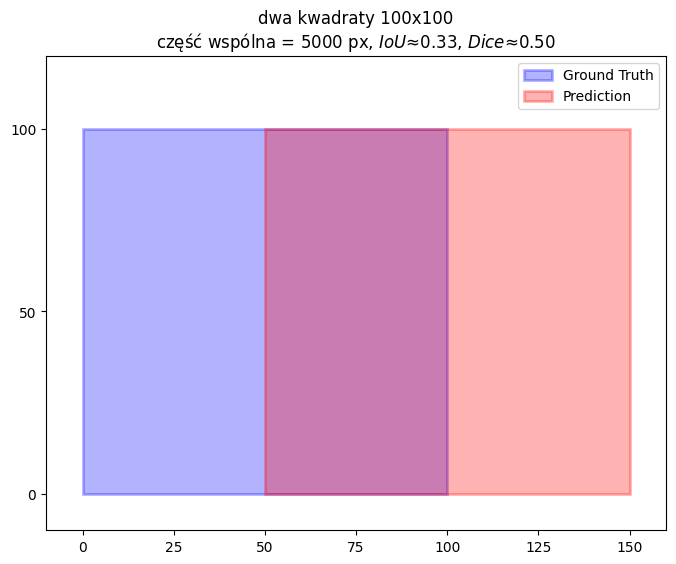

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tworzymy rysunek i osie
fig, ax = plt.subplots(figsize=(8,8))

# Ground Truth (GT) - niebieski kwadrat 100x100
gt_rect = patches.Rectangle(
    (0, 0), 100, 100,              # pozycja (x, y), szerokość, wysokość
    linewidth=2,
    edgecolor='blue',
    facecolor='blue',
    alpha=0.3,
    label="Ground Truth"
)

# Predykcja (Pred) - czerwony kwadrat 100x100 przesunięty o 50px w prawo
pred_rect = patches.Rectangle(
    (50, 0), 100, 100,             # przesunięcie w prawo o 50
    linewidth=2,
    edgecolor='red',
    facecolor='red',
    alpha=0.3,
    label="Prediction"
)


intersection = 5000
area_gt = 10000
area_pred = 10000


# IoU
iou = intersection / (area_gt + area_pred - intersection)

# Dice
dice = 2 * intersection / (area_gt + area_pred)


# Dodajemy prostokąty do osi
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)

# Ustawienia osi
ax.set_xlim(-10, 160)
ax.set_ylim(-10, 120)

# ustawiamy podziałki na osiach
ax.set_xticks(range(0, 160, 25))  # ticki na osi X co 25 jednostek
ax.set_yticks(range(0, 120, 50))  # ticki na osi Y co 25 jednostek

ax.set_aspect('equal', adjustable='box')
ax.legend(loc="upper right")
ax.set_title(f"dwa kwadraty 100x100\nczęść wspólna = 5000 px, $IoU ≈ {iou:.2f}$, $Dice ≈ {dice:.2f}$")

plt.show()
